In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
from __future__ import division


import matplotlib.gridspec as gridspec 
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn

#nlp
import string
import re    #for regexfrom sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

chat_df = pd.read_json('../data/oppia-chat.json')
chat_df.head()

editedAt  \
0                       NaN   
1  2018-01-25T14:58:34.511Z   
2                       NaN   
3  2018-01-26T13:21:41.314Z   
4                       NaN   

                                            fromUser  \
0  {u'username': u'yashLadha', u'gv': u'4', u'dis...   
1  {u'username': u'bansalnitish', u'gv': u'4', u'...   
2  {u'username': u'bansalnitish', u'gv': u'4', u'...   
3  {u'username': u'joydeep1701', u'gv': u'4', u'd...   
4  {u'username': u'seanlip', u'gv': u'4', u'displ...   

                                                html  \
0  Thanks <span data-link-type="mention" data-scr...   
1  <span data-link-type="mention" data-screen-nam...   
2  Please review <span data-link-type="issue" dat...   
3  <pre><code>        Raises:\n            NotImp...   
4  The first, but indent the continuation line by 4.   

                         id                                           issues  \
0  5a698b69ce68c3bc74ff3b39                                               []   
1  5a69f04a6117191e61afa2fa  [{u'repo': u'oppia/oppia', u'number': u'4607'}]   
2  5a6a6669ae53c15903361054  [{u'repo': u'oppia/oppia', u'number': u'4608'}]   
3  5a6b2b3298927d57453bfd06                                               []   
4  5a6c01d5ce68c3bc740c8e69                                               []   

                                            mentions meta  readBy  \
0  [{u'userIds': [], u'userId': u'5a3bf0b1d73408c...   []      39   
1  [{u'userIds': [], u'userId': u'560b5913d33f749...   []      40   
2                                                 []   []      41   
3                                                 []   []      45   
4                                                 []   []      45   

                       sent  status  \
0  2018-01-25T07:46:49.126Z     NaN   
1  2018-01-25T14:57:14.418Z     NaN   
2  2018-01-25T23:21:13.980Z     NaN   
3  2018-01-26T13:20:50.168Z     NaN   
4  2018-01-27T04:36:37.926Z     NaN   

                                                text  unread urls  v  
0                                      Thanks @apb7    False   []  1  
1  @seanlip I need some help with getting a revie...   False   []  2  
2  Please review https://github.com/oppia/oppia/p...   False   []  1  
3  ```\n        Raises:\n            NotImplement...   False   []  4  
4  The first, but indent the continuation line by 4.   False   []  1

In [2]:
def Extract_Username(column):
    temp_dict = dict(column)
    return temp_dict['username']

def Extract_Issue_Number(column):
    if column != []:
        temp_dict = dict(column[0])
        return temp_dict['number']
    else:
        return np.nan 
def Extract_URLs(column):
    if column != []:
        temp_dict = dict(column[0])
        return temp_dict[u'url']
    else:
        return np.nan
def Mentions(column):
    mention_lst = ', '.join(re.findall("@([a-z0-9_]+)", column, re.I))
    return mention_lst

chat_df['username'] = chat_df['fromUser'].apply(Extract_Username)
chat_df['issue number'] = chat_df['issues'].apply(Extract_Issue_Number)
chat_df['url'] = chat_df['urls'].apply(Extract_URLs)
chat_df['mentions'] = chat_df['text'].apply(Mentions)
chat_df['mentions'].replace(to_replace ='', value= np.nan, inplace = True )

cols_to_drop = ["fromUser","html","issues","meta","status","unread","urls"]
chat_df.drop(cols_to_drop, axis=1, inplace=True)

chat_df['sent'] = pd.to_datetime(chat_df['sent'])
chat_df['editedAt'] = pd.to_datetime(chat_df['editedAt'])


In [3]:
chat_df =chat_df[[ u'id',u'username',u'text',u'issue number',u'mentions',u'sent',u'editedAt',u'readBy',u'v',u'url']]

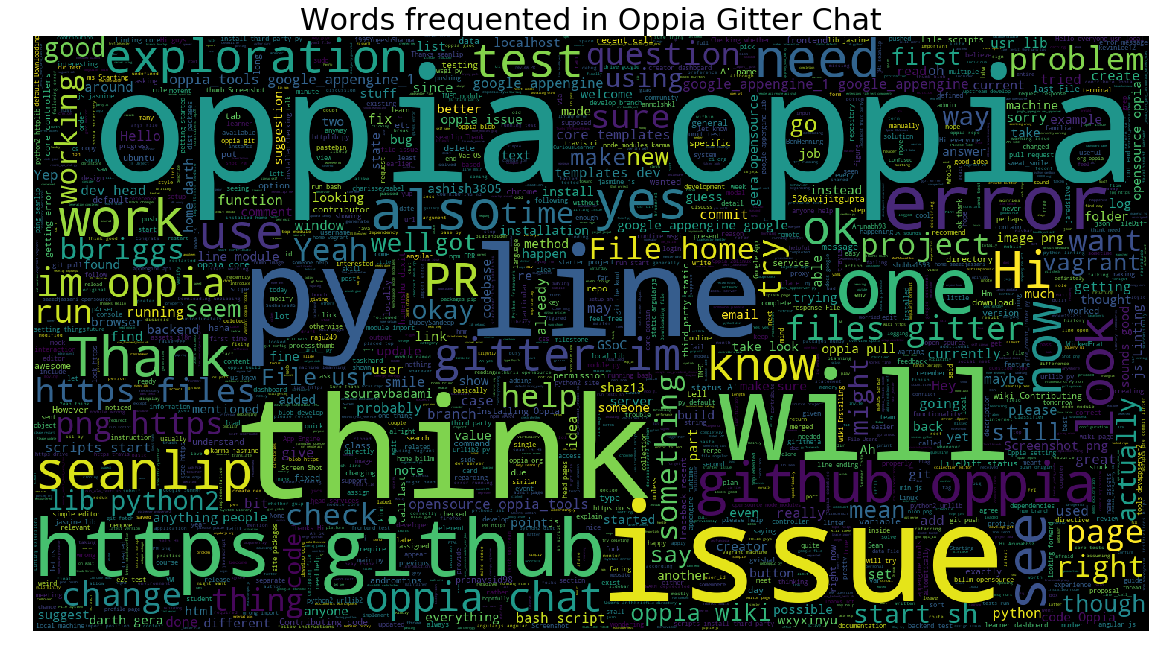

In [4]:
stopword=set(STOPWORDS)
text=chat_df.text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words frequented in Oppia Gitter Chat", fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

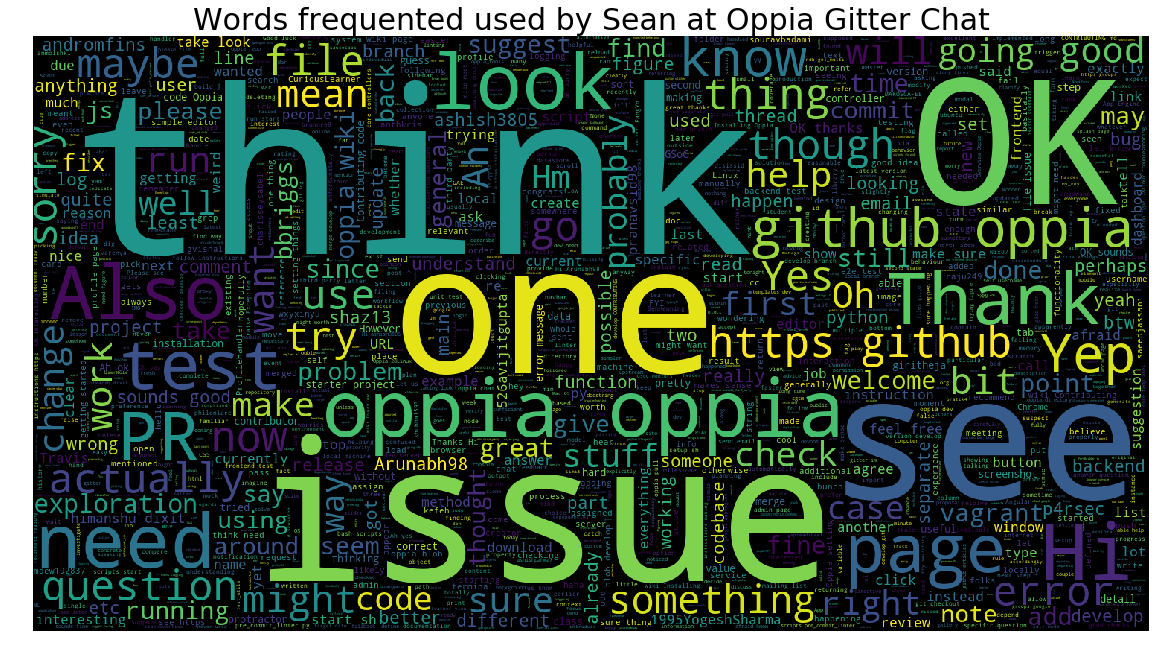

In [5]:
text=chat_df[chat_df['username'] == 'seanlip'].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words frequented used by Sean at Oppia Gitter Chat", fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

In [6]:
chat_df['question_marks'] = chat_df['text'].apply(lambda comment: comment.count('?'))

In [7]:
print "Number of Questions asked:" , chat_df[ chat_df['question_marks']>0].text.shape[0]
print "Total number of comments:" , chat_df.shape[0]
print "Percentage of Questions:", (chat_df[ chat_df['question_marks']>0].text.shape[0] / chat_df.shape[0])*100

Number of Questions asked: 3052
Total number of comments: 14477
Percentage of Questions: 21.0817158251


In [8]:
chat_df['Year'] = chat_df['sent'].dt.year
chat_df['Month'] = chat_df['sent'].dt.month
chat_df['Quarter'] = chat_df['sent'].dt.quarter
chat_df['DOW'] = chat_df['sent'].dt.dayofweek
chat_df['Day'] = chat_df['sent'].dt.day
chat_df['Hour'] = chat_df['sent'].dt.hour

In [9]:
chat_df.head()

id      username  \
0  5a698b69ce68c3bc74ff3b39     yashLadha   
1  5a69f04a6117191e61afa2fa  bansalnitish   
2  5a6a6669ae53c15903361054  bansalnitish   
3  5a6b2b3298927d57453bfd06   joydeep1701   
4  5a6c01d5ce68c3bc740c8e69       seanlip   

                                                text issue number mentions  \
0                                      Thanks @apb7           NaN     apb7   
1  @seanlip I need some help with getting a revie...         4607  seanlip   
2  Please review https://github.com/oppia/oppia/p...         4608      NaN   
3  ```\n        Raises:\n            NotImplement...          NaN      NaN   
4  The first, but indent the continuation line by 4.          NaN      NaN   

                     sent                editedAt  readBy  v  url  \
0 2018-01-25 07:46:49.126                     NaT      39  1  NaN   
1 2018-01-25 14:57:14.418 2018-01-25 14:58:34.511      40  2  NaN   
2 2018-01-25 23:21:13.980                     NaT      41  1  NaN   
3 2018-01-26 13:20:50.168 2018-01-26 13:21:41.314      45  4  NaN   
4 2018-01-27 04:36:37.926                     NaT      45  1  NaN   

   question_marks  Year  Month  Quarter  DOW  Day  Hour  
0               0  2018      1        1    3   25     7  
1               0  2018      1        1    3   25    14  
2               0  2018      1        1    3   25    23  
3               1  2018      1        1    4   26    13  
4               0  2018      1        1    5   27     4

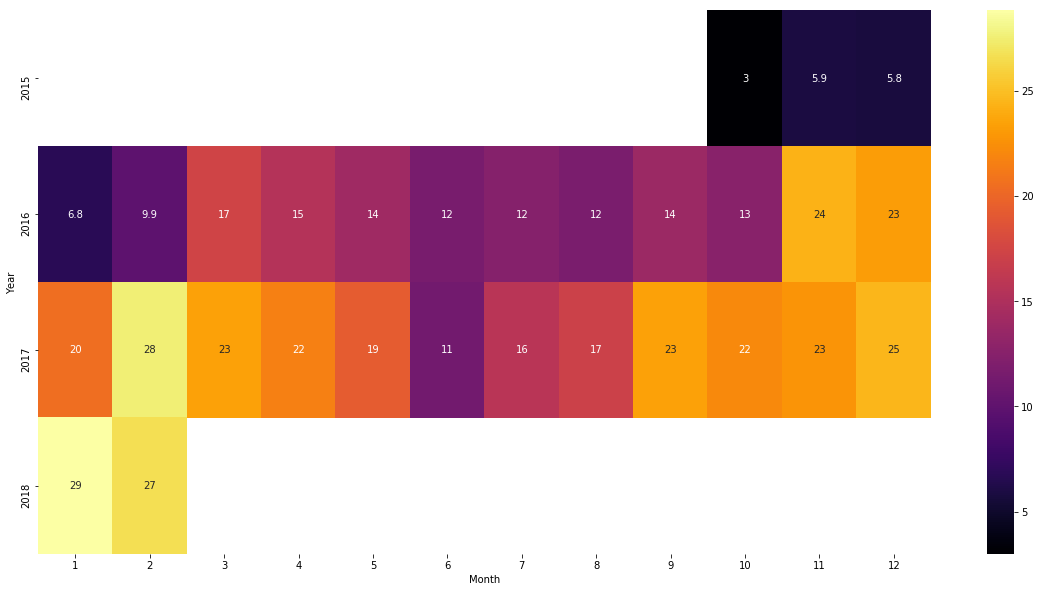

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(chat_df.pivot_table(values='readBy',
                                index='Year', columns='Month') , cmap='inferno', annot = True)

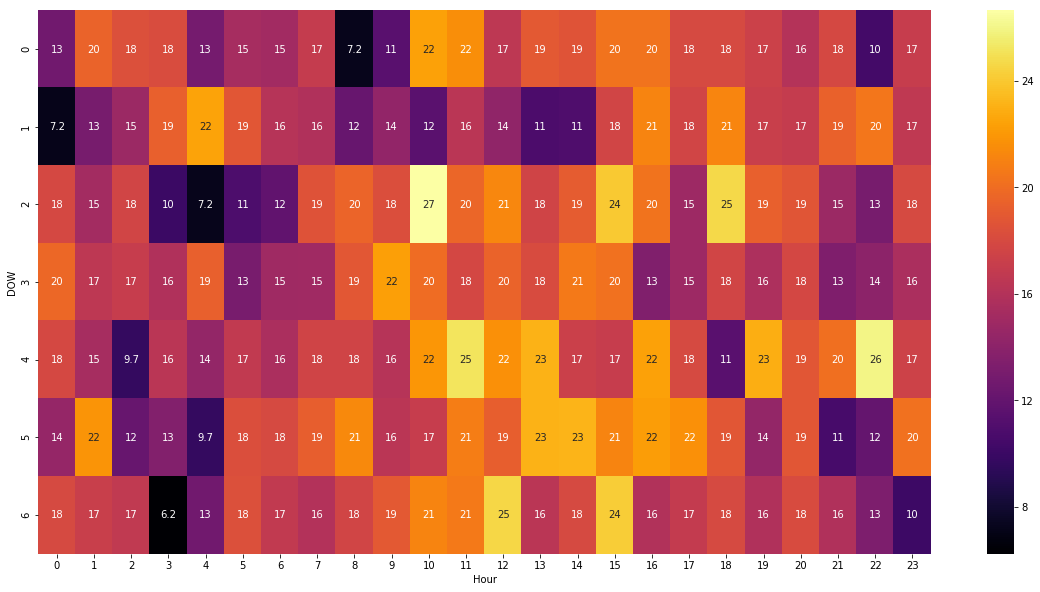

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(chat_df[chat_df['Year'] > 2015].pivot_table(values='readBy',
                                index='DOW', columns='Hour') , cmap='inferno', annot = True)

In [12]:
chat_df.head()

id      username  \
0  5a698b69ce68c3bc74ff3b39     yashLadha   
1  5a69f04a6117191e61afa2fa  bansalnitish   
2  5a6a6669ae53c15903361054  bansalnitish   
3  5a6b2b3298927d57453bfd06   joydeep1701   
4  5a6c01d5ce68c3bc740c8e69       seanlip   

                                                text issue number mentions  \
0                                      Thanks @apb7           NaN     apb7   
1  @seanlip I need some help with getting a revie...         4607  seanlip   
2  Please review https://github.com/oppia/oppia/p...         4608      NaN   
3  ```\n        Raises:\n            NotImplement...          NaN      NaN   
4  The first, but indent the continuation line by 4.          NaN      NaN   

                     sent                editedAt  readBy  v  url  \
0 2018-01-25 07:46:49.126                     NaT      39  1  NaN   
1 2018-01-25 14:57:14.418 2018-01-25 14:58:34.511      40  2  NaN   
2 2018-01-25 23:21:13.980                     NaT      41  1  NaN   
3 2018-01-26 13:20:50.168 2018-01-26 13:21:41.314      45  4  NaN   
4 2018-01-27 04:36:37.926                     NaT      45  1  NaN   

   question_marks  Year  Month  Quarter  DOW  Day  Hour  
0               0  2018      1        1    3   25     7  
1               0  2018      1        1    3   25    14  
2               0  2018      1        1    3   25    23  
3               1  2018      1        1    4   26    13  
4               0  2018      1        1    5   27     4

In [13]:
print plt.style.available

[u'seaborn-darkgrid', u'Solarize_Light2', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'fast', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [14]:
import matplotlib as mpl
# plt.style.use('seaborn-whitegrid')

Text(0,0.5,u'Number of Questions')

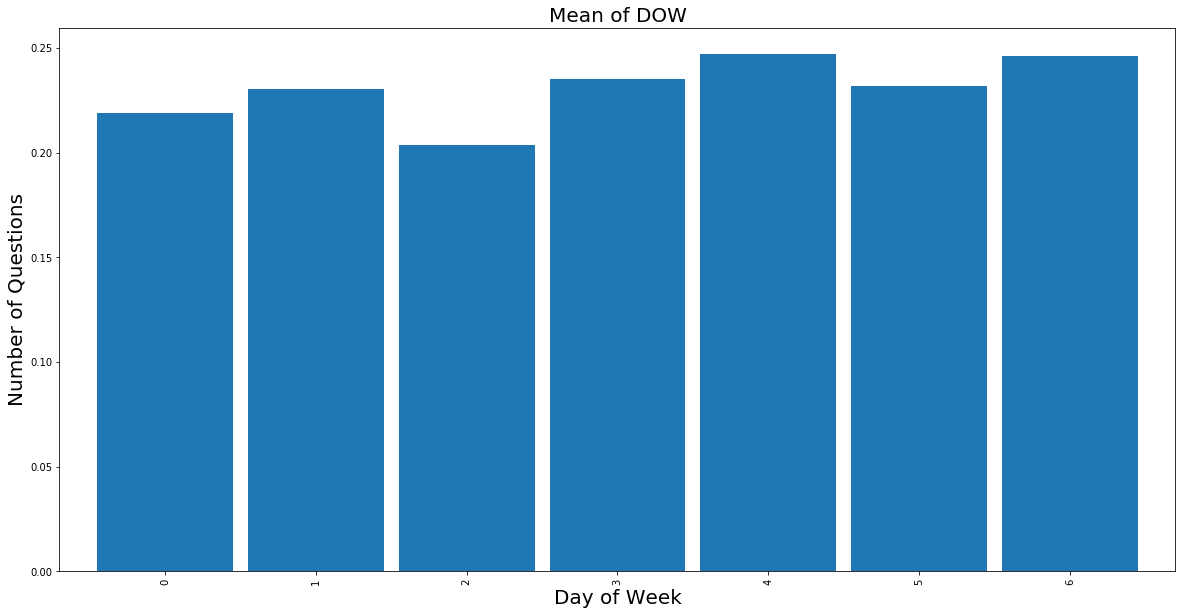

In [15]:
plt.title('Mean of DOW', fontsize=20)
chat_df.groupby(by='DOW').mean()['question_marks'].plot(figsize=(20,10), kind = 'bar',width=.9)
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Number of Questions', fontsize=20)

Text(0,0.5,u'Number of Questions')

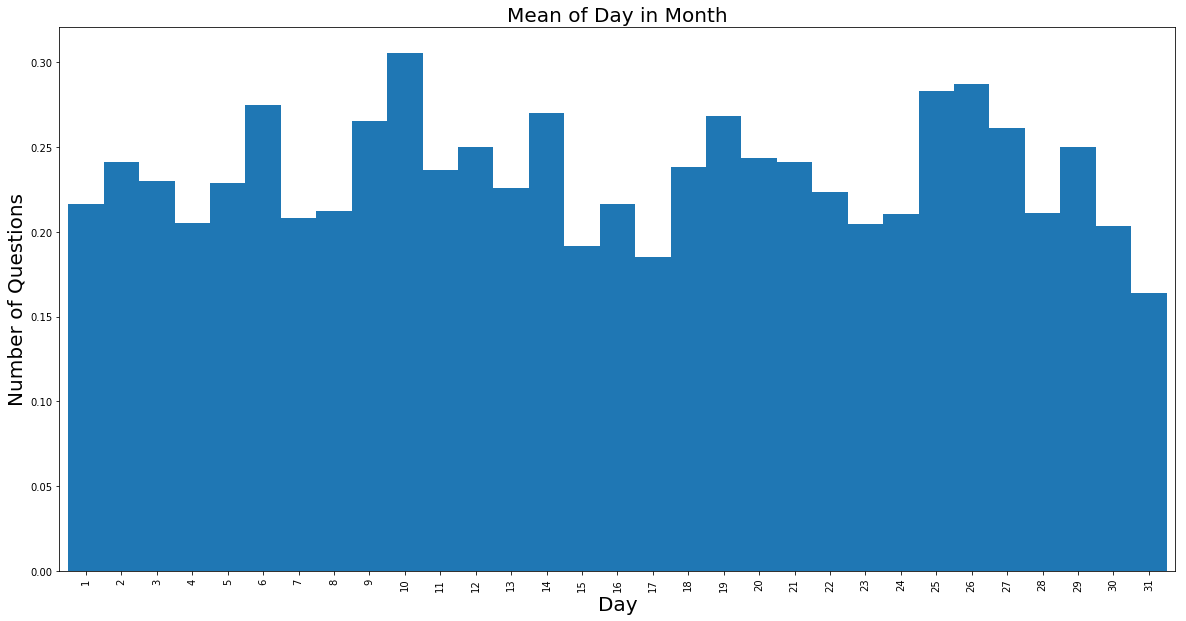

In [16]:
plt.title('Mean of Day in Month', fontsize=20)
chat_df.groupby(by='Day').mean()['question_marks'].plot(figsize=(20,10), kind='bar', width=1)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Number of Questions', fontsize=20)

Text(0,0.5,u'Number of Questions')

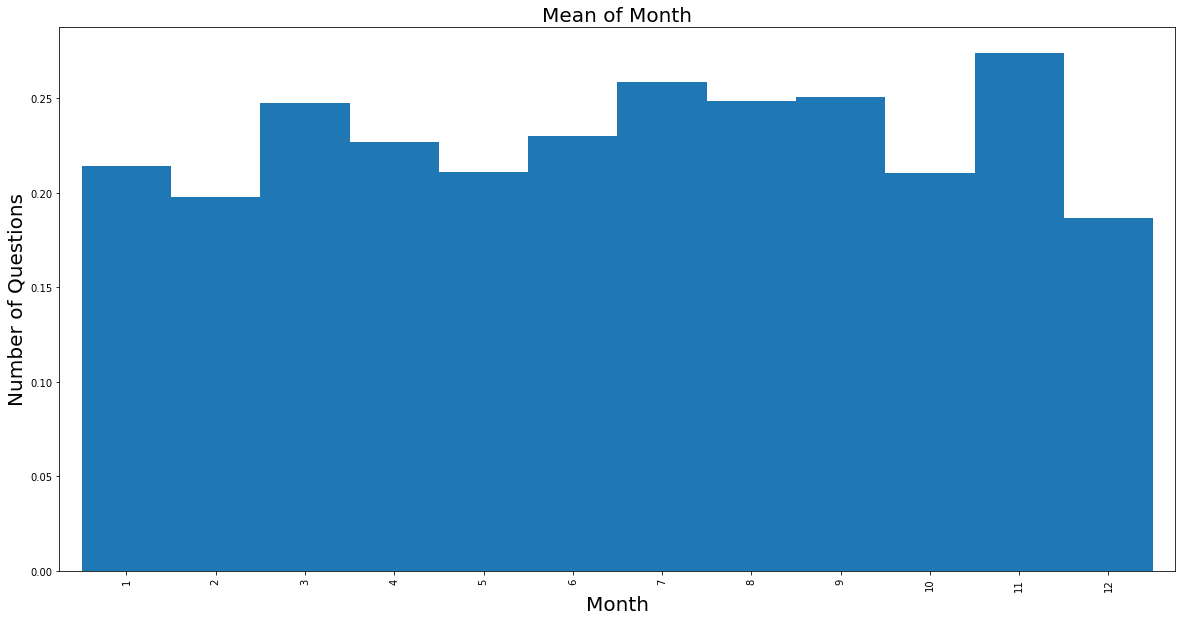

In [17]:
plt.title('Mean of Month', fontsize=20)
chat_df.groupby(by='Month').mean()['question_marks'].plot(figsize=(20,10), kind='bar', width=1)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Questions', fontsize=20)

Text(0,0.5,u'Number of Questions')

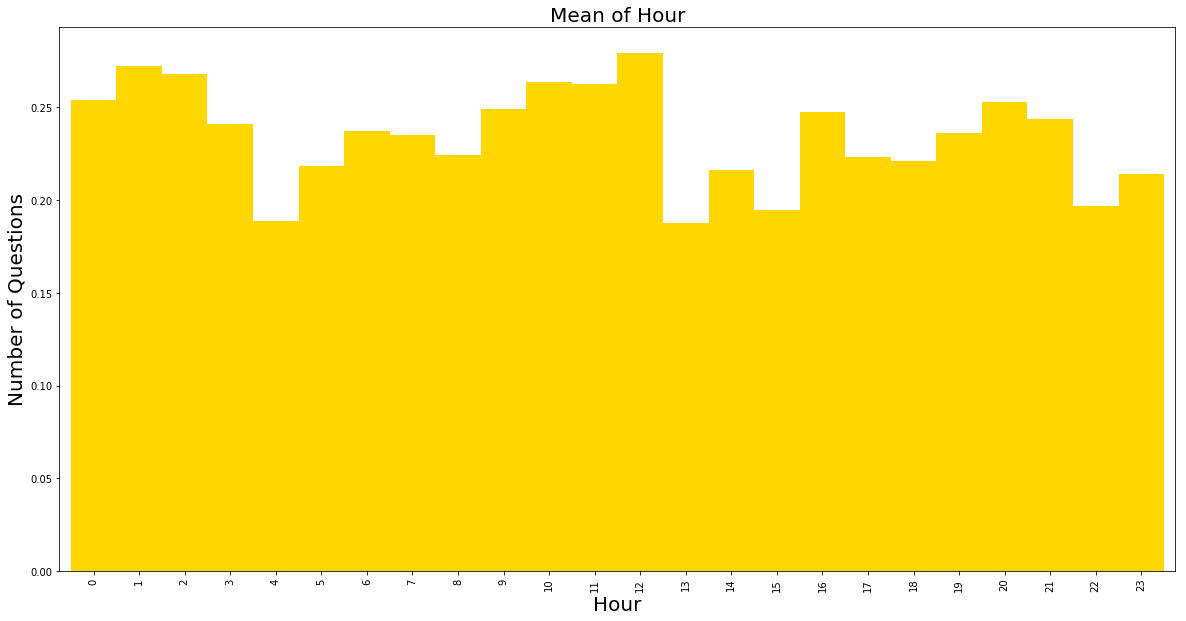

In [18]:
plt.title('Mean of Hour', fontsize=20)
chat_df.groupby(by='Hour').mean()['question_marks'].plot(figsize=(20,10), kind='bar', width=1, color='gold')
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Number of Questions', fontsize=20)

In [19]:
chat_df.to_json('../data/chat_data.json')

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [21]:
import nltk
nltk.download('stopwords')
# function to clean data
stops = set(stopwords.words("english"))
def cleanData(text, lowercase = False, remove_stops = False, stemming = False):
    txt = text
    txt = re.sub(r'[^A-Za-z0-9\s]',r'',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])
    
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])

    return txt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shazmohammad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
chat_df['text'] = chat_df['text'].apply(cleanData, lowercase = True, remove_stops = True, stemming = True)

In [23]:
tfidfvec = TfidfVectorizer(analyzer='word', ngram_range = (1,3), min_df = 30)

In [24]:
tfidfdata = tfidfvec.fit_transform(chat_df['text'])

In [25]:
feature_names = tfidfvec.get_feature_names()
len(feature_names)

699

In [26]:
# create dataframe for features
tfidf_df = pd.DataFrame(tfidfdata.todense())

# set column names
tfidf_df.columns = feature_names

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X=tfidf_df)
cluster = pd.DataFrame(chat_df[['text','mentions','username','sent','question_marks']])
cluster['cluster'] = kmeans.predict(tfidf_df)

In [29]:
cluster['cluster'].value_counts()

0    12690
1      817
3      629
2      341
Name: cluster, dtype: int64

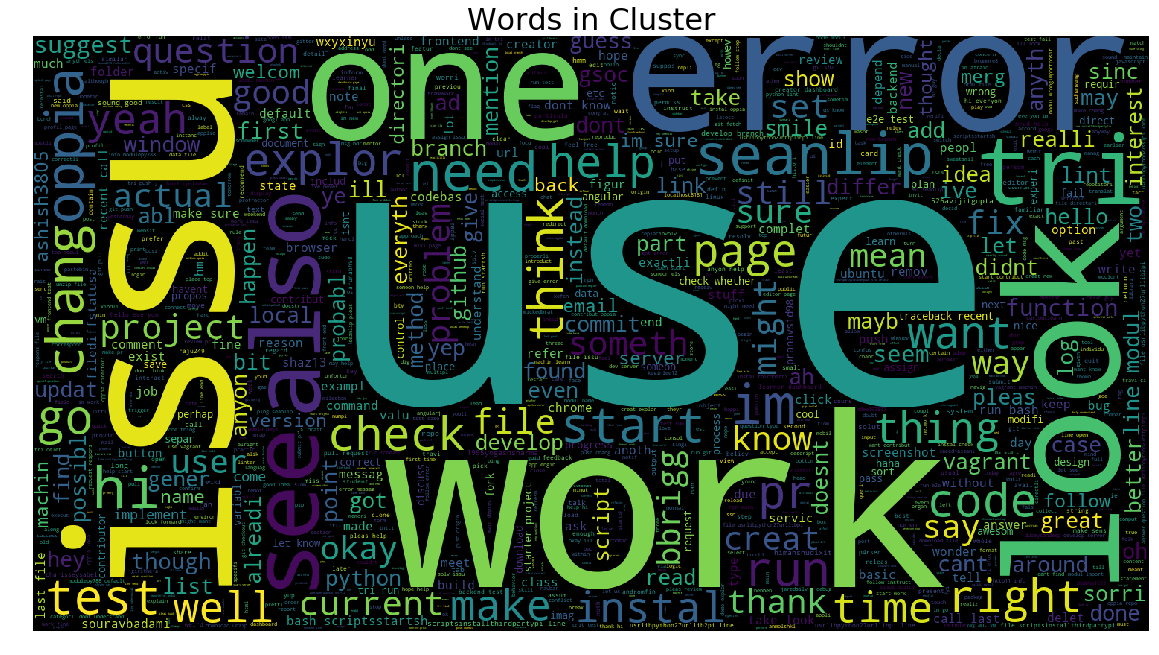

In [30]:
text=cluster[cluster['cluster'] == 0].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

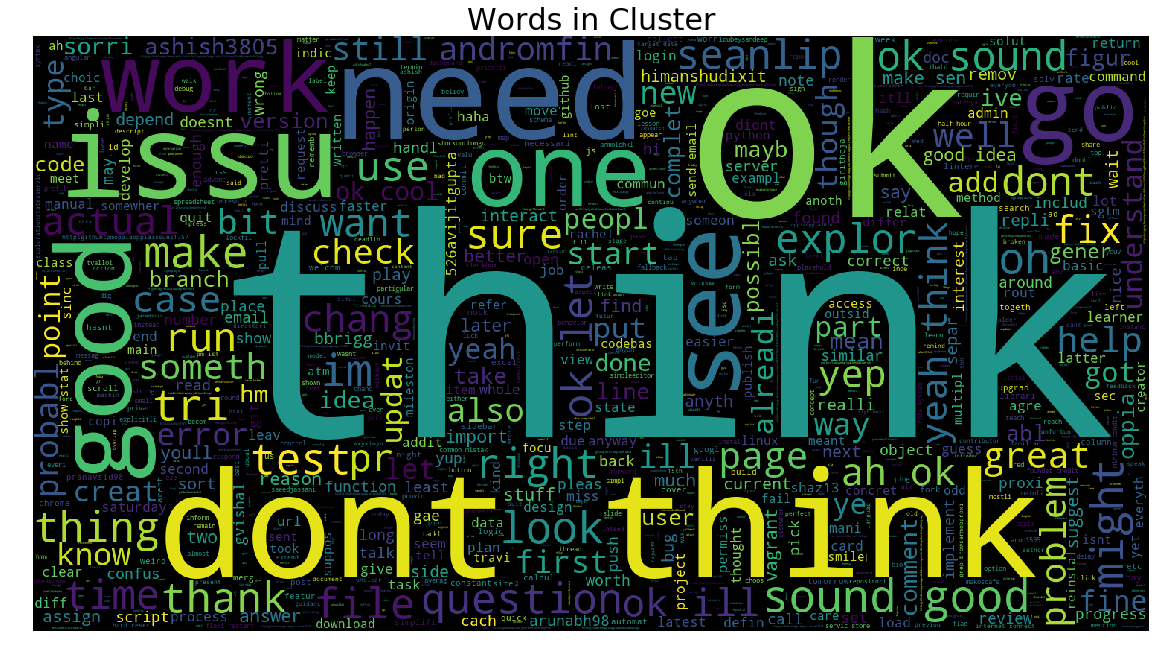

In [31]:
text=cluster[cluster['cluster'] == 1].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

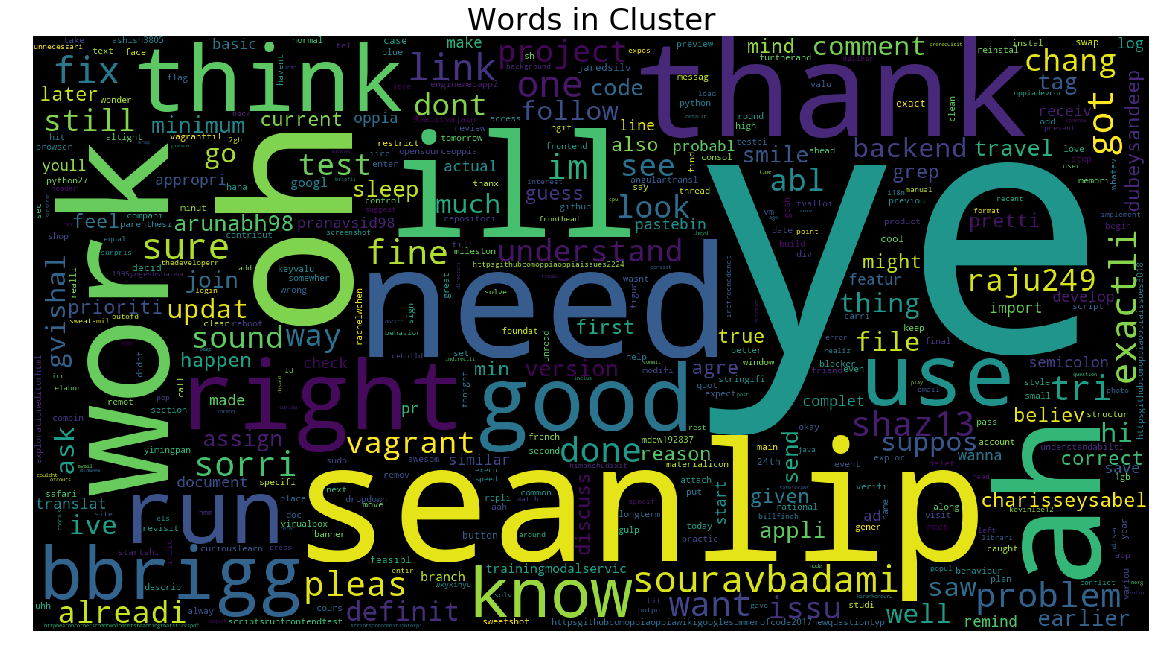

In [32]:
text=cluster[cluster['cluster'] == 2].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

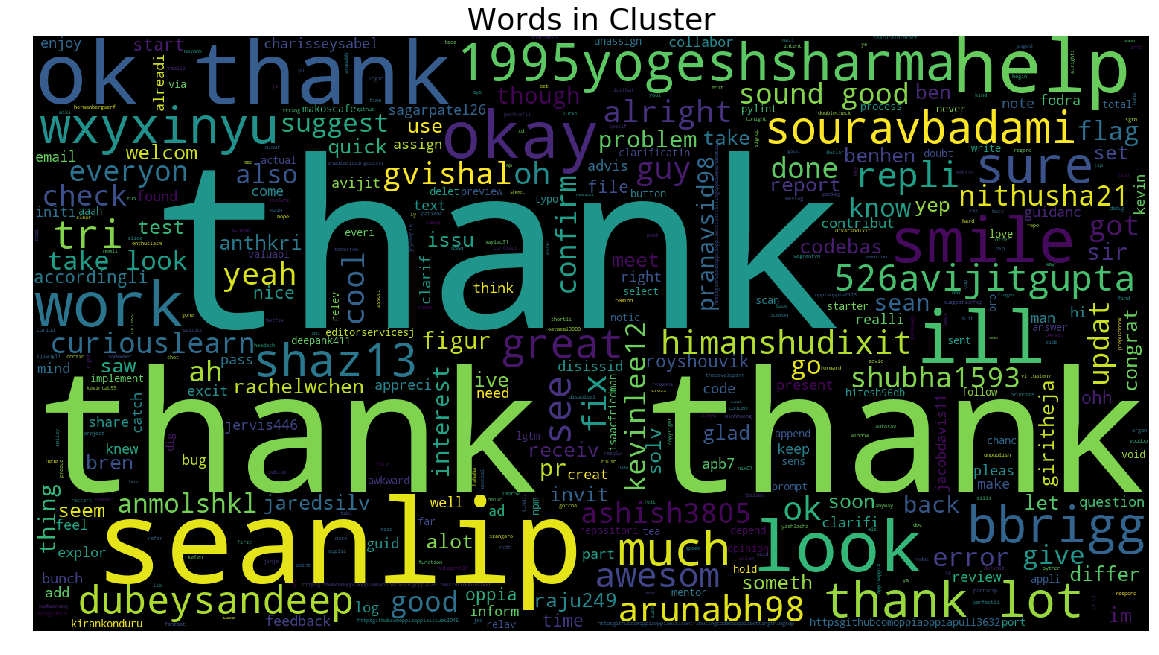

In [33]:
text=cluster[cluster['cluster'] == 3].text.values
wc= WordCloud(background_color="black", max_words=2000, stopwords=stopword, height=800, width=1500)
wc.generate(" ".join(text))
plt.figure(figsize=(20,12))
plt.axis("off")
plt.title("Words in Cluster" , fontsize=30)
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=1)
plt.show()

In [34]:
chat_df.head()

id      username  \
0  5a698b69ce68c3bc74ff3b39     yashLadha   
1  5a69f04a6117191e61afa2fa  bansalnitish   
2  5a6a6669ae53c15903361054  bansalnitish   
3  5a6b2b3298927d57453bfd06   joydeep1701   
4  5a6c01d5ce68c3bc740c8e69       seanlip   

                                                text issue number mentions  \
0                                         thank apb7          NaN     apb7   
1  seanlip need help get review assign pull reque...         4607  seanlip   
2      pleas review httpsgithubcomoppiaoppiapull4608         4608      NaN   
3  rais notimplementederror method overwritten de...          NaN      NaN   
4                        first indent continu line 4          NaN      NaN   

                     sent                editedAt  readBy  v  url  \
0 2018-01-25 07:46:49.126                     NaT      39  1  NaN   
1 2018-01-25 14:57:14.418 2018-01-25 14:58:34.511      40  2  NaN   
2 2018-01-25 23:21:13.980                     NaT      41  1  NaN   
3 2018-01-26 13:20:50.168 2018-01-26 13:21:41.314      45  4  NaN   
4 2018-01-27 04:36:37.926                     NaT      45  1  NaN   

   question_marks  Year  Month  Quarter  DOW  Day  Hour  
0               0  2018      1        1    3   25     7  
1               0  2018      1        1    3   25    14  
2               0  2018      1        1    3   25    23  
3               1  2018      1        1    4   26    13  
4               0  2018      1        1    5   27     4

In [35]:
MostActiveUsers = pd.DataFrame(chat_df.username.value_counts()[1:10]).reset_index()

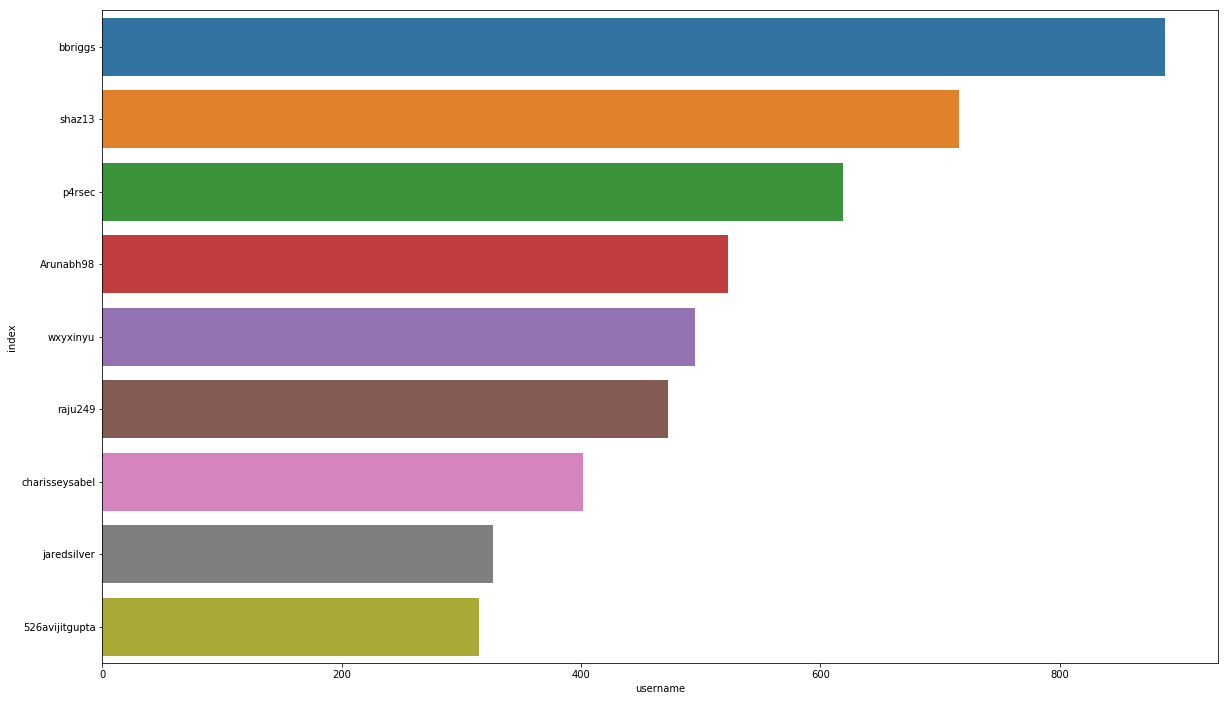

In [36]:
plt.figure(figsize=(20,12))
sns.barplot(y=MostActiveUsers['index'], x=MostActiveUsers.username )